In [2]:
#SOME NECESSORY PRECURSORS KEPT HANDY

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi

x,y,z,n,L,nx,ny,nz,Lx,Ly,Lz=sp.symbols('x y z n L nx ny nz Lx Ly Lz', real=True)
psi1D=(sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L))
psiX = psi1D.subs({n:nx,L:Lx})
psiY= psi1D.subs({x:y,n:ny,L:Ly})
psiZ= psi1D.subs({x:z,n:ny,L:Ly})
#Functions to be used from here onwards 
psi2DPIB = sp.lambdify('x,y,nx,ny,Lx,Ly', psiX * psiY, 'numpy')
psi3DPIB = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz', psiX * psiY * psiZ, 'numpy')
psiSquared1D = sp.lambdify('x,n,L',psi1D*np.conjugate(psi1D), 'numpy')
psiSquared2D = sp.lambdify('x,y,nx,ny,Lx,Ly',psiX * psiY *np.conjugate(psiX * psiY), 'numpy')
psiSquared3D = sp.lambdify('x,y,z,nx,ny,nz,Lx,Ly,Lz',psiX * psiY * psiZ*np.conjugate(psiX * psiY * psiZ), 'numpy')
Energy1D = sp.lambdify('n,L',((const.hbar*np.pi*n/L)**2)/(2*const.m_e))
m=const.m_e
Lval=const.physical_constants['Bohr radius'][0]

In [3]:
#QUES 3: Probability of 1D PIB to be in range(0,L/4) for first 10 Eigenstates

from scipy.integrate import quad
for i in range(1,11):
    def integrand(x):
        return psiSquared1D(x,i,Lval)
    integral, integral_error= quad(integrand, 0, Lval/4)
    print("For n=%d, Probability=%f, Error=%f"%(i,integral,integral_error))

For n=1, Probability=0.090845, Error=0.000000
For n=2, Probability=0.250000, Error=0.000000
For n=3, Probability=0.303052, Error=0.000000
For n=4, Probability=0.250000, Error=0.000000
For n=5, Probability=0.218169, Error=0.000000
For n=6, Probability=0.250000, Error=0.000000
For n=7, Probability=0.272736, Error=0.000000
For n=8, Probability=0.250000, Error=0.000000
For n=9, Probability=0.232316, Error=0.000000
For n=10, Probability=0.250000, Error=0.000000


In [4]:
#QUES 4: <p> for 1D PIB for first 10 Eigenstates

expression= (psi1D*-(1j)*const.hbar*sp.diff(sp.conjugate(psi1D),x)).subs({L:Lval})

for i in range(1,11):
    print('For n=%d, <p>='%i,(sp.integrate(expression,(x,0,Lval))).subs({n:i}))


For n=1, <p>= 0
For n=2, <p>= 0
For n=3, <p>= 0
For n=4, <p>= 0
For n=5, <p>= 0
For n=6, <p>= 0
For n=7, <p>= 0
For n=8, <p>= 0
For n=9, <p>= 0
For n=10, <p>= 0


In [5]:
#QUES 5: Expectation values for n=2 1D-PIB

expression_p= (psi1D*-(1j)*const.hbar*sp.diff(sp.conjugate(psi1D),x)).subs({L:Lval})
expression_psq= (psi1D*((-(1j)*const.hbar)**2)*sp.diff(sp.diff(sp.conjugate(psi1D),x),x)).subs({L:Lval})
expression_x= (psi1D*x*sp.conjugate(psi1D)).subs({L:Lval})
expression_xsq= (psi1D*(x**2)*sp.conjugate(psi1D)).subs({L:Lval})

exp_position = sp.integrate(expression_x,(x,0,Lval)).subs({n:2}).evalf()
exp_momentum = sp.integrate(expression_p,(x,0,Lval)).subs({n:2}).evalf()
expSq_momentum= sp.integrate(expression_psq,(x,0,Lval)).subs({n:2}).evalf()
expSq_position= sp.integrate(expression_xsq,(x,0,Lval)).subs({n:2}).evalf()

print("For n=2,\n<x>=",exp_position)
print("<x**2>=",expSq_position)
print("<p>=",exp_momentum)
print("<p**2>=",expSq_momentum)
print("Standard deviation in x:",((expSq_position)-(exp_position)**2)**0.5)
print('Standard deviation in p:',((expSq_momentum)-(exp_momentum)**2)**0.5)
print("Uncertainty product/(hbar/2)=",(((expSq_position)-(exp_position)**2)**0.5)*(((expSq_momentum)-(exp_momentum)**2)**0.5)*2/const.hbar)
print("Yes, it's greater than one!" if (((((expSq_position)-(exp_position)**2)**0.5)*(((expSq_momentum)-(exp_momentum)**2)**0.5)*2/const.hbar) >=1) else None )



For n=2,
<x>= 2.64588605451500e-11
<x**2>= 8.97962375353637e-22
<p>= 0
<p**2>= 1.56786907091466e-46
Standard deviation in x: 1.40673762303402e-11
Standard deviation in p: 1.25214578660580e-23
Uncertainty product/(hbar/2)= 3.34057967047424
Yes, it's greater than one!


$$ \psi(x) = {{(630/L^9)^{1 \over 2}}{x^2}(L-x)^2} $$


Normalisation constant= 1.0000000000000022
Error= 1.110223024625159e-14


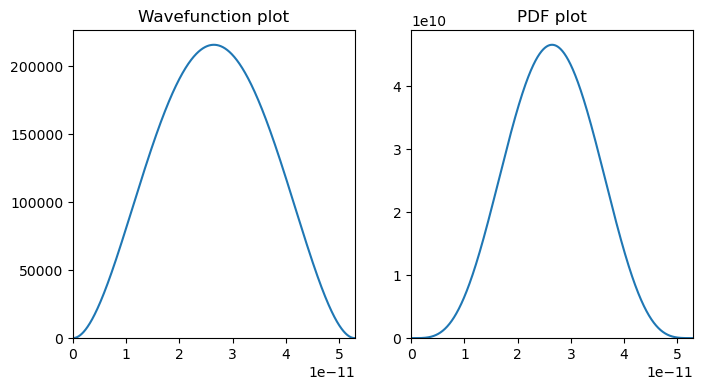

<E>= 2.6158468333339596e-17 Joules
Error= 3.5069876719668645e-31 Joules
<x>= 2.6458860545150057e-11 meters
Error= 2.9375236182571713e-25 meters
<p>= 0 kg-m/s

Avg energy of n=1 1D-PIB,= 2.151447784904047e-17 which is very close to that of the given QM state
Avg position of n=1 1D-PIB= L/2 which is SAME as in this example
Avg momentum of n=1 1D-PIB is imaginary, while in this example, it is zero


In [6]:
#QUES 6: ANALYSIS OF THE GIVEN QUANTUM MECHANICAL STATE OF A PARTICLE TRAPPED IN A 1D BOX

x,L = sp.symbols('x L',real=True)
psi = ((630/L**9)**0.5)*((x*(L-x))**2)
normalisation_constant,error = quad(sp.lambdify('x',(psi*sp.conjugate(psi)).subs({L:Lval}),'numpy'), 0, Lval)
print('Normalisation constant=',normalisation_constant)
print('Error=',error)
xval=np.linspace(0,Lval,1000)
yval= sp.lambdify('x',psi.subs({L:Lval}),'numpy')(xval)
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(xval,yval)
ax[0].set_xlim(0,Lval)
ax[0].set_ylim(0)
ax[1].plot(xval,yval**2)
ax[1].set_xlim(0,Lval)
ax[1].set_ylim(0)
ax[0].set_title('Wavefunction plot')
ax[1].set_title('PDF plot')
plt.show()
# <E>
integrand= sp.lambdify('x',(psi*(-(const.hbar**2)/(2*m))*sp.diff(sp.diff(sp.conjugate(psi),x),x)).subs({L:Lval}),'numpy')
exp_Energy, Error= quad(integrand, 0, Lval)
print('<E>=',exp_Energy,'Joules')
print('Error=',Error,'Joules')

# <x>
integrand= sp.lambdify('x',(psi*x*(sp.conjugate(psi))).subs({L:Lval}),'numpy')
exp_Position, Error= quad(integrand, 0, Lval)
print('<x>=',exp_Position,'meters')
print('Error=',Error,'meters')

#<p>
integrand= sp.integrate((psi*(-(1j)*const.hbar)*sp.diff(sp.conjugate(psi),x)).subs({L:Lval}),(x,0,Lval))
print('<p>=',integrand,'kg-m/s')

print('\nAvg energy of n=1 1D-PIB,=',Energy1D(1,Lval),'which is very close to that of the given QM state')
print('Avg position of n=1 1D-PIB= L/2 which is SAME as in this example')
print('Avg momentum of n=1 1D-PIB is imaginary, while in this example, it is zero')




$$ \psi(x,y)={{30 \over (L_x^5 L_y^5)^{1/2}}x(L_x-x)y(Ly-y)} $$

In [7]:
#QUES 7: ANALYSIS OF THE GIVEN QM STATE OF A PARTICLE TRAPPED IN A 2D BOX
Lx=Ly=Lval
def psi(x,y):
    return (30/(Lx*Ly)**2.5)*x*(Lx-x)*y*(Ly-y)
def integrand(x,y):
    return psi(x,y)*np.conjugate(psi(x,y))

normalisation_constant, error= spi.dblquad(integrand,0,Ly,lambda y:0,lambda y:Lx)
print('Normalisation constant=',normalisation_constant)
print('Error=',error)

#<Ex>
x,y=sp.symbols('x y',real=True)
psiX = ((30**0.5)/(Lx)**2.5)*x*(Lx-x)
Ex= sp.integrate((psiX*(-(const.hbar**2)/(2*m))*sp.diff(sp.diff(sp.conjugate(psiX),x),x)),(x,0,Lx))
print("\n<Ex>=",Ex,"Joules")

#<Ey>
psiY = ((30**0.5)/(Ly)**2.5)*y*(Ly-y)
Ey= sp.integrate((psiY*(-(const.hbar**2)/(2*m))*sp.diff(sp.diff(sp.conjugate(psiY),y),y)),(y,0,Ly))
print("<Ey>=",Ey,"Joules")

print("\nSo, total average energy of the particle=",Ex+Ey)
print("Lowest Average energy of 2D PIB=",Energy1D(1,Lx)+Energy1D(1,Ly))
print("Both values are comparable")

#<px>
Lx = sp.symbols('Lx',real=True)
psiX = ((30**0.5)/(Lx)**2.5)*x*(Lx-x)
px= sp.integrate((psiX*(-(1j)*const.hbar)*sp.diff(sp.conjugate(psiX),x)),(x,0,Lx)).subs({Lx:Lval})
print('\n<px>=',px,'kg-m/s')

#<py>
Ly = sp.symbols('Ly',real=True)
psiY = ((30**0.5)/(Ly)**2.5)*y*(Ly-y)
py= sp.integrate((psiY*(-(1j)*const.hbar)*sp.diff(sp.conjugate(psiY),y)),(y,0,Ly)).subs({Ly:Lval})
print('<py>=',py,'kg-m/s')

#<x>
Lx = sp.symbols('Lx',real=True)
psiX = ((30**0.5)/(Lx)**2.5)*x*(Lx-x)
exp_x= sp.integrate((psiX*(x)*sp.conjugate(psiX)),(x,0,Lx)).subs({Lx:Lval})
print('\n<x>=',exp_x,'m')

#<y>
Ly = sp.symbols('Ly',real=True)
psiY = ((30**0.5)/(Ly)**2.5)*y*(Ly-y)
exp_y= sp.integrate((psiY*(y)*sp.conjugate(psiY)),(y,0,Ly)).subs({Ly:Lval})
print('<y>=',exp_y,'m')

#Comment
print("\nAverage position and momentum in this case are same as in 2D-PIB groundstate values")


Normalisation constant= 0.9999999999999998
Error= 0.00039337827258659967

<Ex>= 2.17987236111164e-17 Joules
<Ey>= 2.17987236111164e-17 Joules

So, total average energy of the particle= 4.35974472222328e-17
Lowest Average energy of 2D PIB= 4.302895569808094e-17
Both values are comparable

<px>= 0 kg-m/s
<py>= 0 kg-m/s

<x>= 2.64588605451500e-11 m
<y>= 2.64588605451500e-11 m

Average position and momentum in this case are same as in 2D-PIB groundstate values


In [8]:
#QUES 8: 2D PIB Degeneracy problem with Lx= 1a0 , Ly= 2a0

def Ex(nx):
    return Energy1D(nx,1*Lval)
def Ey(ny):
    return Energy1D(ny,2*Lval)
Energy_states={}
firstTen_ES={}
Degenerate_states={}
for i in range(1,10):
    for j in range(1,10):
        Energy_states[(i,j)]=Ex(i)+Ey(j)
ascEnergy_states={k: v for k, v in sorted(Energy_states.items(), key=lambda item: item[1])}
for i in range(10):
    firstTen_ES[list(ascEnergy_states.keys())[i]]=list(ascEnergy_states.values())[i]
print("First ten Energy states in (nx,ny): forms are")
for key, value in firstTen_ES.items():
    print(key, ":", value)

for key, value in firstTen_ES.items():
    if value in Degenerate_states:
        Degenerate_states[value].append(key)
    else:
        Degenerate_states[value] = [key]

print("\nEigenenergy-eigenstate pairs:")
for key, value in Degenerate_states.items():
    print(key, ":", value)
print("\nDegenerate states:")
for key, value in Degenerate_states.items():
    if len(value)>1:
        print(value,"corresponding to Eigenenergy:",key,"Joules")



First ten Energy states in (nx,ny): forms are
(1, 1) : 2.6893097311300587e-17
(1, 2) : 4.302895569808094e-17
(1, 3) : 6.992205300938152e-17
(2, 1) : 9.1436530858422e-17
(1, 4) : 1.0757238924520235e-16
(2, 2) : 1.0757238924520235e-16
(2, 3) : 1.3446548655650295e-16
(1, 5) : 1.559799644055434e-16
(2, 4) : 1.7211582279232376e-16
(3, 1) : 1.9900892010362435e-16

Eigenenergy-eigenstate pairs:
2.6893097311300587e-17 : [(1, 1)]
4.302895569808094e-17 : [(1, 2)]
6.992205300938152e-17 : [(1, 3)]
9.1436530858422e-17 : [(2, 1)]
1.0757238924520235e-16 : [(1, 4), (2, 2)]
1.3446548655650295e-16 : [(2, 3)]
1.559799644055434e-16 : [(1, 5)]
1.7211582279232376e-16 : [(2, 4)]
1.9900892010362435e-16 : [(3, 1)]

Degenerate states:
[(1, 4), (2, 2)] corresponding to Eigenenergy: 1.0757238924520235e-16 Joules


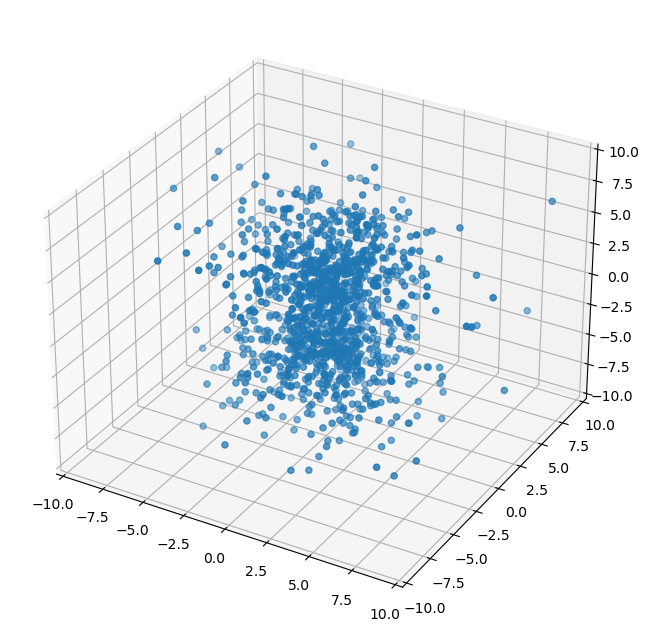

In [9]:
#QUES 10: 2pz atomic orbital visualisation
x,y,z=sp.symbols('x y z', real=True)
symbolic_exp= ((32*np.pi)**(-0.5))*z*sp.exp(-((x*x+y*y+z*z)**0.5)/2)
psi3DPIB = sp.lambdify('x,y,z', symbolic_exp, 'numpy')
psiSquared3D = sp.lambdify('x,y,z',symbolic_exp*sp.conjugate(symbolic_exp), 'numpy')
fig, axs= plt.subplots(1,1, figsize= (8,8),subplot_kw={"projection": "3d"})
accepted_xpoints=[]
accepted_ypoints=[]
accepted_zpoints=[]
for i in range(100000):
    xval = np.random.uniform(-10,10)
    yval= np.random.uniform(-10,10)
    zval= np.random.uniform(-10,10)
    if psiSquared3D(xval,yval,zval)>= np.random.uniform(0,0.01):
        accepted_xpoints.append(xval)
        accepted_ypoints.append(yval)
        accepted_zpoints.append(zval)
axs.set_xlim(-10,10)
axs.set_ylim(-10,10)
axs.set_zlim(-10,10)
axs.scatter(accepted_xpoints,accepted_ypoints,accepted_zpoints)
plt.show()

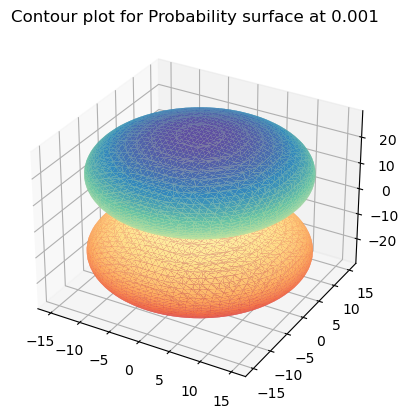

In [10]:
#QUES 10 contd.: ISOCONTOUR PLOT
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
import matplotlib.pyplot as plt

x, y, z = sp.symbols('x y z', real=True)
psiSquared3D = sp.lambdify('x, y, z', symbolic_exp * sp.conjugate(symbolic_exp), 'numpy')

# NumPy mgrid with different variable names
x_vals, y_vals, z_vals = np.mgrid[-10:10:100j, -10:10:100j, -10:10:100j]

iso_val = 0.001
data = psiSquared3D(x_vals, y_vals, z_vals)
verts, faces, _, _ = measure.marching_cubes(data, iso_val)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Translate the vertices to center the plot around the origin
verts_centered = verts - verts.mean(axis=0)

# Calculate the min and max values along each axis in the centered verts array
x_min, y_min, z_min = np.min(verts_centered, axis=0)
x_max, y_max, z_max = np.max(verts_centered, axis=0)

# Set coordinate axes limits based on min and max values
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
ax.set_title('Contour plot for Probability surface at 0.001')

ax.plot_trisurf(verts_centered[:, 0], verts_centered[:, 1], faces, verts_centered[:, 2], cmap='Spectral', lw=1)

plt.show()


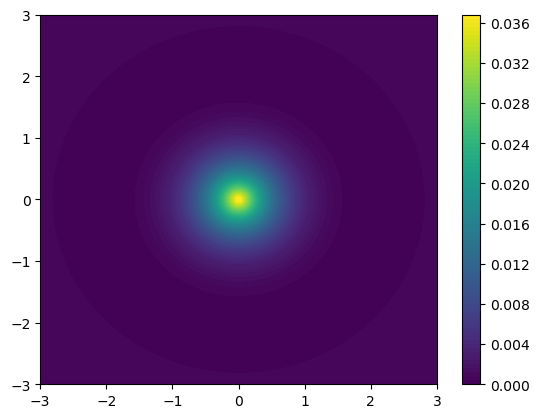

In [11]:
#QUES 11: 2s orbital visualisation: Contour method
x,y,z=sp.symbols('x y z', real=True)
symbolic_exp= ((32*np.pi)**(-0.5))*(2-((x*x+y*y+z*z)**0.5))*sp.exp(-((x*x+y*y+z*z)**0.5)/2)
pdf3DPIB = sp.lambdify('x,y,z', symbolic_exp* sp.conjugate(symbolic_exp), 'numpy')
def pdf3DPIB_xy(x,y):
    return pdf3DPIB(x,y,0)
x= np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
X,Y= np.meshgrid(x,y)
Z=pdf3DPIB_xy(X,Y)
plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.colorbar()
plt.show()

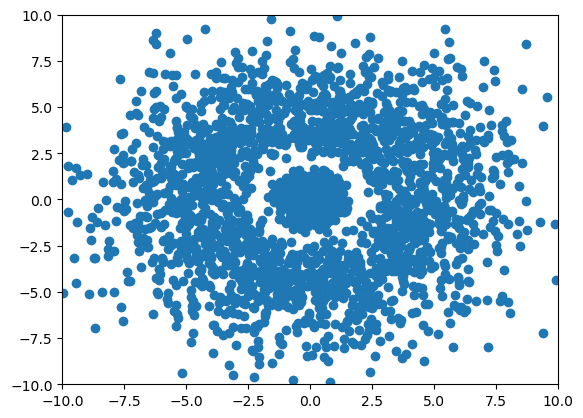

In [12]:
#QUES 11 contd.: Cloud method

accepted_xpoints=[]
accepted_ypoints=[]
for i in range(100000):
    xval = np.random.uniform(-10,10)
    yval= np.random.uniform(-10,10)
    if pdf3DPIB_xy(xval,yval)>= np.random.uniform(0,0.01):
        accepted_xpoints.append(xval)
        accepted_ypoints.append(yval)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(accepted_xpoints,accepted_ypoints)
plt.show()

In [16]:
#QUES 10: 3D PIB Degeneracy problem with Lx=Ly= 1a0 , Lz= 2a0

def Ex(nx):
    return Energy1D(nx,1*Lval)
def Ey(ny):
    return Energy1D(ny,1*Lval)
def Ez(nz):
    return Energy1D(nz,2*Lval)
Energy_states={}
firstTen_ES={}
Degenerate_states={}
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            Energy_states[(i,j,k)]=Ex(i)+Ey(j)+Ez(k)
        
ascEnergy_states={k: v for k, v in sorted(Energy_states.items(), key=lambda item: item[1])}
for i in range(10):
    firstTen_ES[list(ascEnergy_states.keys())[i]]=list(ascEnergy_states.values())[i]
print("First ten Energy states in (nx,ny,nz): forms are")
for key, value in firstTen_ES.items():
    print(key, ":", value)

for key, value in firstTen_ES.items():
    if value in Degenerate_states:
        Degenerate_states[value].append(key)
    else:
        Degenerate_states[value] = [key]

print("\nEigenenergy-eigenstate pairs:")
for key, value in Degenerate_states.items():
    print(key, ":", value)
print("\nDegenerate states:")
for key, value in Degenerate_states.items():
    if len(value)>1:
        print(value,"corresponding to Eigenenergy:",key,"Joules")



First ten Energy states in (nx,ny,nz): forms are
(1, 1, 1) : 4.8407575160341057e-17
(1, 1, 2) : 6.454343354712141e-17
(1, 1, 3) : 9.143653085842199e-17
(1, 2, 1) : 1.1295100870746246e-16
(2, 1, 1) : 1.1295100870746246e-16
(1, 1, 4) : 1.2908686709424283e-16
(1, 2, 2) : 1.2908686709424283e-16
(2, 1, 2) : 1.2908686709424283e-16
(1, 2, 3) : 1.559799644055434e-16
(2, 1, 3) : 1.559799644055434e-16

Eigenenergy-eigenstate pairs:
4.8407575160341057e-17 : [(1, 1, 1)]
6.454343354712141e-17 : [(1, 1, 2)]
9.143653085842199e-17 : [(1, 1, 3)]
1.1295100870746246e-16 : [(1, 2, 1), (2, 1, 1)]
1.2908686709424283e-16 : [(1, 1, 4), (1, 2, 2), (2, 1, 2)]
1.559799644055434e-16 : [(1, 2, 3), (2, 1, 3)]

Degenerate states:
[(1, 2, 1), (2, 1, 1)] corresponding to Eigenenergy: 1.1295100870746246e-16 Joules
[(1, 1, 4), (1, 2, 2), (2, 1, 2)] corresponding to Eigenenergy: 1.2908686709424283e-16 Joules
[(1, 2, 3), (2, 1, 3)] corresponding to Eigenenergy: 1.559799644055434e-16 Joules


In [14]:
#QUES 12: EXPECTATION VALUE OF SUPERPOSED WAVEFUNCTION

import ipywidgets as widgets
from IPython.display import display, clear_output

L=Lval
hbar=const.hbar
m=const.m_e
def energy1DPIB(n,L):
    return ((hbar*n*np.pi/L)**2)/(2*m)
def plot_function(t):
    def superposed(X):
        Superposed=0
        for n in [1, 2]:
            Y = np.sqrt(2/L) * np.sin(n * np.pi * X / L)*np.exp(-(1j)*t*energy1DPIB(n,L)/hbar)
            Superposed+=(1/np.sqrt(2))*Y
        return Superposed
    x=np.linspace(0,L,1000)
    for n in [1, 2]:
        y = np.sqrt(2/L) * np.sin(n * np.pi * x / L)*np.exp(-(1j)*t*energy1DPIB(n,L)/hbar)
        plt.plot(x, y*np.conjugate(y), '-' if n == 1 else '--', label='n=1' if n == 1 else 'n=2')
        plt.fill_between(x, y*np.conjugate(y), color='lightblue', alpha=0.5)
    plt.plot(x,superposed(x)*np.conjugate(superposed(x)), ':', label='Superposition of |n=1> and |n=2>')
    plt.fill_between(x,superposed(x)*np.conjugate(superposed(x)), color='lightblue', alpha=0.5)
    def integrand(X):
        return superposed(X)*X*np.conjugate(superposed(X))
    integral,error = quad(integrand,0,L)
    plt.axvline(x=integral, color='red', linestyle='-', label='Expected position of particle in superposed state')
    plt.xlabel('x')
    plt.ylabel(r'$|\psi|^2$')
    plt.title('Eigenstates in a PIB problem for n=1,2')
    plt.legend()
    plt.show()
    print("<x> for superposed state:",integral,"m,","Error in calculation:",error,"m")

# Define the range and initial value for the slider
t_min = 0.0
t_max = 100.0
t_step = 0.5
t_initial= 0.0

# Create the slider widget
slider = widgets.FloatSlider(
    value=t_initial,
    min=t_min,
    max=t_max,
    step=t_step,
    description='TIME in seconds:',
    continuous_update=True
)

# Display the interactive plot using interactive_output
interactive_plot = widgets.interactive_output(plot_function, {'t': slider})
display(widgets.VBox([slider, interactive_plot]))

In [15]:
#QUES 13: SERIES EXPANSION INTO SUM OF EIGENSTATES OF A 1D PIB And its time evolution

import ipywidgets as widgets
from IPython.display import display, clear_output
#Coefficients calculation
L=Lval
x,n,t=sp.symbols('x n t',real=True)
Eigen_psi= (sp.sqrt(2/L) * sp.sin(n * sp.pi * x / L))
psi=((630/L**9)**0.5)*((x*(L-x))**2)
for i in range(1,6):
    expression = sp.conjugate(psi)*Eigen_psi
    integrand= sp.lambdify('x',expression.subs({n:i}),'numpy')
    integral,error =quad(integrand,0,L)
    print("c%d="%i,integral,"| Error=",error)

def energy1DPIB(n,L):
    return ((hbar*n*np.pi/L)**2)/(2*m)


def plot_function(t):
    sum=0 
    for i in range(1,11):
        expression = sp.conjugate(psi)*Eigen_psi
        integrand= sp.lambdify('x',expression.subs({n:i}),'numpy')
        integral,error =quad(integrand,0,L)
        sum+=Eigen_psi.subs({n:i})*integral*sp.exp(-(1j)*t*energy1DPIB(i,L)/hbar)
    series=sp.lambdify('x',sum,'numpy')
    x=np.linspace(0,L,1000)
    plt.plot(x,series(x), ':')
    plt.fill_between(x, series(x), color='lightblue', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel(r'$\psi$ as calculated by series')
    plt.title('Series animation')
    plt.show()

# Define the range and initial value for the slider
t_min = 0.0
t_max = 100.0
t_step = 0.5
t_initial= 0.0

# Create the slider widget
slider = widgets.FloatSlider(
    value=t_initial,
    min=t_min,
    max=t_max,
    step=t_step,
    description='TIME in seconds:',
    continuous_update=True
)

# Display the interactive plot using interactive_output
interactive_plot = widgets.interactive_output(plot_function, {'t': slider})
display(widgets.VBox([slider, interactive_plot]))



    
    

c1= 0.9884533022688088 | Error= 1.097403614945601e-14
c2= 3.03368765488515e-17 | Error= 8.380607403184732e-15
c3= -0.1466899409789968 | Error= 1.9494013906444627e-09
c4= 1.0708835898064692e-16 | Error= 8.20239714408397e-15
c5= -0.034852439545032185 | Error= 8.416742780167907e-15
